In [505]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as wb

# Magic
%matplotlib inline

In [506]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = ['AMZN','AAPL', 'TSLA', 'KR', 'KO', 'JNJ', 'AGNC', 'BA','ENPH']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [507]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2112 entries, 2012-03-30 to 2020-08-20
Data columns (total 9 columns):
AMZN    2112 non-null float64
AAPL    2112 non-null float64
TSLA    2112 non-null float64
KR      2112 non-null float64
KO      2112 non-null float64
JNJ     2112 non-null float64
AGNC    2112 non-null float64
BA      2112 non-null float64
ENPH    2112 non-null float64
dtypes: float64(9)
memory usage: 165.0 KB


In [508]:
historical_data.head()

,AMZN,AAPL,TSLA,KR,KO,JNJ,AGNC,BA,ENPH
Date,,,,,,,,,
2012-03-30,202.509995,74.013542,37.240002,9.901978,28.365374,52.127304,10.186590,60.742779,7.34
2012-04-02,198.050003,76.368927,36.580002,9.967365,28.415201,52.324871,10.314181,61.396198,7.81
2012-04-03,199.660004,77.688583,38.009998,9.697648,28.269562,52.064075,10.365912,60.971493,7.64
2012-04-04,193.990005,77.070114,35.000000,9.620002,28.154577,51.676838,10.352114,60.171062,7.45
2012-04-05,194.389999,78.226830,34.480000,9.742599,28.158411,51.637318,10.369355,60.105701,7.43


In [509]:
historical_data.tail()

,AMZN,AAPL,TSLA,KR,KO,JNJ,AGNC,BA,ENPH
Date,,,,,,,,,
2020-08-14,3148.020020,459.630005,1650.709961,35.389999,48.450001,148.240005,13.88,178.080002,73.160004
2020-08-17,3182.409912,458.429993,1835.640015,36.000000,48.209999,148.990005,13.80,172.009995,75.059998
2020-08-18,3312.489990,462.250000,1887.089966,36.240002,48.419998,150.089996,13.88,170.229996,75.160004
2020-08-19,3260.479980,462.829987,1878.530029,36.220001,47.369999,150.389999,13.94,169.270004,75.489998
2020-08-20,3297.370117,473.100006,2001.829956,35.919998,47.349998,151.419998,13.94,169.580002,73.089996


In [510]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2112 entries, 2012-03-30 to 2020-08-20
Data columns (total 9 columns):
AMZN    2111 non-null float64
AAPL    2111 non-null float64
TSLA    2111 non-null float64
KR      2111 non-null float64
KO      2111 non-null float64
JNJ     2111 non-null float64
AGNC    2111 non-null float64
BA      2111 non-null float64
ENPH    2111 non-null float64
dtypes: float64(9)
memory usage: 165.0 KB


In [511]:
returns.head()

,AMZN,AAPL,TSLA,KR,KO,JNJ,AGNC,BA,ENPH
Date,,,,,,,,,
2012-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-02,-0.022270,0.031328,-0.017882,0.006582,0.001755,0.003783,0.012448,0.010700,0.062066
2012-04-03,0.008096,0.017132,0.038348,-0.027433,-0.005139,-0.004997,0.005003,-0.006941,-0.022007
2012-04-04,-0.028809,-0.007993,-0.082501,-0.008039,-0.004076,-0.007466,-0.001332,-0.013215,-0.025184
2012-04-05,0.002060,0.014897,-0.014969,0.012663,0.000136,-0.000765,0.001664,-0.001087,-0.002688


In [512]:
returns.tail()

,AMZN,AAPL,TSLA,KR,KO,JNJ,AGNC,BA,ENPH
Date,,,,,,,,,
2020-08-14,-0.004121,-0.000892,0.018162,0.022865,0.001446,0.001620,0.011594,0.018991,-0.023238
2020-08-17,0.010865,-0.002614,0.106188,0.017090,-0.004966,0.005047,-0.005780,-0.034680,0.025639
2020-08-18,0.040061,0.008298,0.027643,0.006645,0.004346,0.007356,0.005780,-0.010402,0.001331
2020-08-19,-0.015826,0.001254,-0.004546,-0.000552,-0.021924,0.001997,0.004313,-0.005655,0.004381
2020-08-20,0.011251,0.021947,0.063572,-0.008317,-0.000422,0.006826,0.000000,0.001830,-0.032309


In [513]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([30.24, 28.15, 53.81, 26.55, 17.73, 17.5 , 23.75, 36.23, 85.68])

In [514]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AMZN,0.13,1.91,33.04,30.24
1,AAPL,0.09,1.78,21.97,28.15
2,TSLA,0.19,3.40,47.19,53.81
3,KR,0.06,1.68,15.26,26.55
4,KO,0.02,1.12,6.07,17.73
5,JNJ,0.05,1.11,12.63,17.50
6,AGNC,0.01,1.50,3.71,23.75
7,BA,0.05,2.29,12.16,36.23
8,ENPH,0.11,5.42,27.22,85.68


In [515]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AMZN   2014-01-31
AAPL   2020-03-16
TSLA   2020-03-16
KR     2017-06-15
KO     2020-03-12
JNJ    2018-12-14
AGNC   2020-03-12
BA     2020-03-16
ENPH   2015-11-04
dtype: datetime64[ns]

In [516]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AMZN   2012-04-27
AAPL   2020-03-13
TSLA   2013-05-09
KR     2019-11-05
KO     2020-04-06
JNJ    2020-03-30
AGNC   2020-03-25
BA     2020-03-25
ENPH   2020-02-19
dtype: datetime64[ns]

In [517]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AMZN,AAPL,TSLA,KR,KO,JNJ,AGNC,BA,ENPH
AMZN,0.000366,0.000143,0.000213,0.000055,0.000054,0.000067,0.000039,0.000121,0.000205
AAPL,0.000143,0.000317,0.000182,0.000049,0.000069,0.000072,0.000064,0.000160,0.000233
TSLA,0.000213,0.000182,0.001158,0.000061,0.000077,0.000065,0.000086,0.000201,0.000368
KR,0.000055,0.000049,0.000061,0.000282,0.000038,0.000051,0.000016,0.000037,0.000090
KO,0.000054,0.000069,0.000077,0.000038,0.000126,0.000064,0.000061,0.000117,0.000093
JNJ,0.000067,0.000072,0.000065,0.000051,0.000064,0.000122,0.000033,0.000095,0.000081
AGNC,0.000039,0.000064,0.000086,0.000016,0.000061,0.000033,0.000226,0.000154,0.000138
BA,0.000121,0.000160,0.000201,0.000037,0.000117,0.000095,0.000154,0.000525,0.000287
ENPH,0.000205,0.000233,0.000368,0.000090,0.000093,0.000081,0.000138,0.000287,0.002936


In [518]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AMZN,AAPL,TSLA,KR,KO,JNJ,AGNC,BA,ENPH
AMZN,0.091475,0.035740,0.053156,0.013778,0.013504,0.016733,0.009642,0.030341,0.051302
AAPL,0.035740,0.079252,0.045482,0.012225,0.017157,0.017942,0.016111,0.040027,0.058250
TSLA,0.053156,0.045482,0.289550,0.015255,0.019368,0.016273,0.021422,0.050254,0.091936
KR,0.013778,0.012225,0.015255,0.070476,0.009431,0.012843,0.003993,0.009349,0.022387
KO,0.013504,0.017157,0.019368,0.009431,0.031453,0.015881,0.015304,0.029200,0.023129
JNJ,0.016733,0.017942,0.016273,0.012843,0.015881,0.030623,0.008250,0.023806,0.020264
AGNC,0.009642,0.016111,0.021422,0.003993,0.015304,0.008250,0.056416,0.038516,0.034412
BA,0.030341,0.040027,0.050254,0.009349,0.029200,0.023806,0.038516,0.131274,0.071736
ENPH,0.051302,0.058250,0.091936,0.022387,0.023129,0.020264,0.034412,0.071736,0.734111


In [519]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AMZN,AAPL,TSLA,KR,KO,JNJ,AGNC,BA,ENPH
AMZN,1.000000,0.419759,0.326617,0.171599,0.251765,0.316159,0.134222,0.276877,0.197972
AAPL,0.419759,1.000000,0.300245,0.163572,0.343641,0.364205,0.240950,0.392427,0.241496
TSLA,0.326617,0.300245,1.000000,0.106786,0.202953,0.172811,0.167609,0.257760,0.199408
KR,0.171599,0.163572,0.106786,1.000000,0.200321,0.276445,0.063329,0.097192,0.098422
KO,0.251765,0.343641,0.202953,0.200321,1.000000,0.511712,0.363301,0.454422,0.152212
JNJ,0.316159,0.364205,0.172811,0.276445,0.511712,1.000000,0.198478,0.375464,0.135152
AGNC,0.134222,0.240950,0.167609,0.063329,0.363301,0.198478,1.000000,0.447559,0.169092
BA,0.276877,0.392427,0.257760,0.097192,0.454422,0.375464,0.447559,1.000000,0.231082
ENPH,0.197972,0.241496,0.199408,0.098422,0.152212,0.135152,0.169092,0.231082,1.000000


In [520]:
no_assets = len(tickers)

In [521]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0


In [522]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)
pflio_scenarios.to_csv("ret_vol_index.csv")

In [523]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.218418,0.210353
1,0.174712,0.179481
2,0.163470,0.194092
3,0.207280,0.244038
4,0.181497,0.201355


In [524]:
pflio_scenarios.tail()

,Return,Volatility
9995,0.213235,0.219240
9996,0.181225,0.270064
9997,0.184488,0.198890
9998,0.179611,0.174539
9999,0.210832,0.201009


In [547]:
for i in range(10000):
    if pflio_scenarios['Return'][i] >= 0.26 and pflio_scenarios['Volatility'][i] <= 0.22:
        print(pflio_scenarios.iloc[i])

Return        0.261057
Volatility    0.215655
Name: 4295, dtype: float64
Return        0.260623
Volatility    0.217160
Name: 4627, dtype: float64
Return        0.260261
Volatility    0.218481
Name: 5050, dtype: float64


In [548]:
index = 4295
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
pflio_wei2 = pflio_wei[index]

print(pflio_scenarios.iloc[index])
tickers_df = pd.DataFrame({'Symbol':tickers})

weights_df = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio = pd.concat([tickers_df, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Weights', ascending=False)
ideal_portfolio

Return        0.261057
Volatility    0.215655
Name: 4295, dtype: float64


,Symbol,Weights
2,TSLA,0.244699
0,AMZN,0.217210
1,AAPL,0.130316
5,JNJ,0.124488
3,KR,0.098383
4,KO,0.091673
6,AGNC,0.064379
8,ENPH,0.019887
7,BA,0.008965


In [549]:
# Calculate Weighted Returns 
weights = np.array([pflio_wei2])
weighted_returns = ( weights * returns)

In [550]:
#pflio_wei2

In [551]:
capital = 16000
price = []
for i in range(len(pflio_wei2)):
    price.append(round(capital*pflio_wei2[i],2))
price = np.array(price)
price_portfolio = pd.DataFrame({'Price':price})
ideal_portfolio = pd.concat([tickers_df, price_portfolio, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Price', ascending=False)
ideal_portfolio

,Symbol,Price,Weights
2,TSLA,3915.18,0.244699
0,AMZN,3475.37,0.217210
1,AAPL,2085.06,0.130316
5,JNJ,1991.81,0.124488
3,KR,1574.12,0.098383
4,KO,1466.76,0.091673
6,AGNC,1030.06,0.064379
8,ENPH,318.19,0.019887
7,BA,143.45,0.008965


In [552]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (250 days)", portfolio_return.mean()*250)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*10, pflio_wei2)))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*250, pflio_wei2)))
print("Portfolio Volatility (250 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*756, pflio_wei2)))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(tickers_df)):
    if i==0:
        div_risk = pflio_var - pflio_wei2[0]**2*variances['Variance'][0]
    else:
        div_risk -= pflio_wei2[i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

print("")
# Non Diversifiable Risk
non_div_risk1 = 0
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)*100
print("Non-Diversifiable Risk:", non_div_risk1, "%")

#print("")
non_div_risk2 = 0
for i in range(len(tickers_df)):
    non_div_risk2 += pflio_wei2[i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.010437352307025234
Portfolio Return (250 days) 0.26093380767563085
Portfolio Return (756 days) 0.7890638344111076

Portfolio Volatility (10 days) 0.04313109076227156
Portfolio Volatility (250 days) 0.2156554538113578
Portfolio Volatility (756 days) 0.37501733142610094

Diversifiable Risk: 35.0 %

Non-Diversifiable Risk: 2.5 %

Non-Diversifiable Risk: 2.5 %
Non-Diversifiable Risk: True


Text(0, 0.5, 'Expected Return')

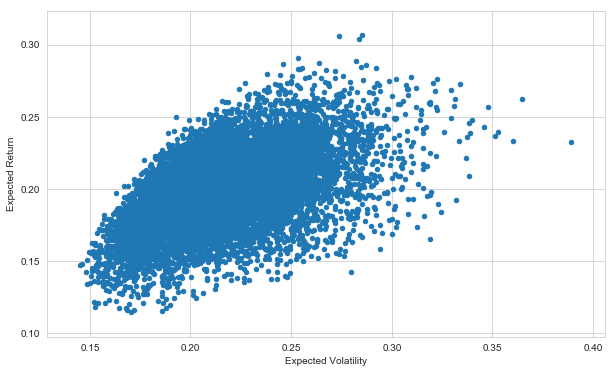

In [542]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

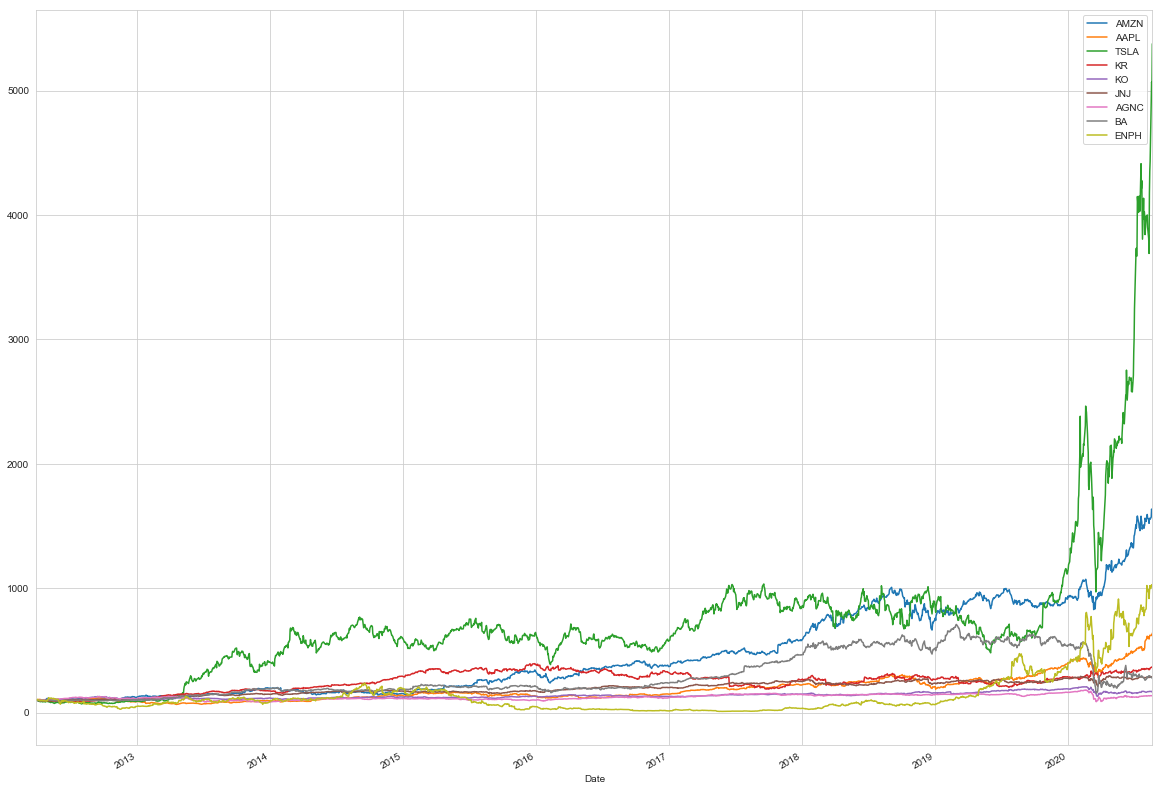

In [543]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

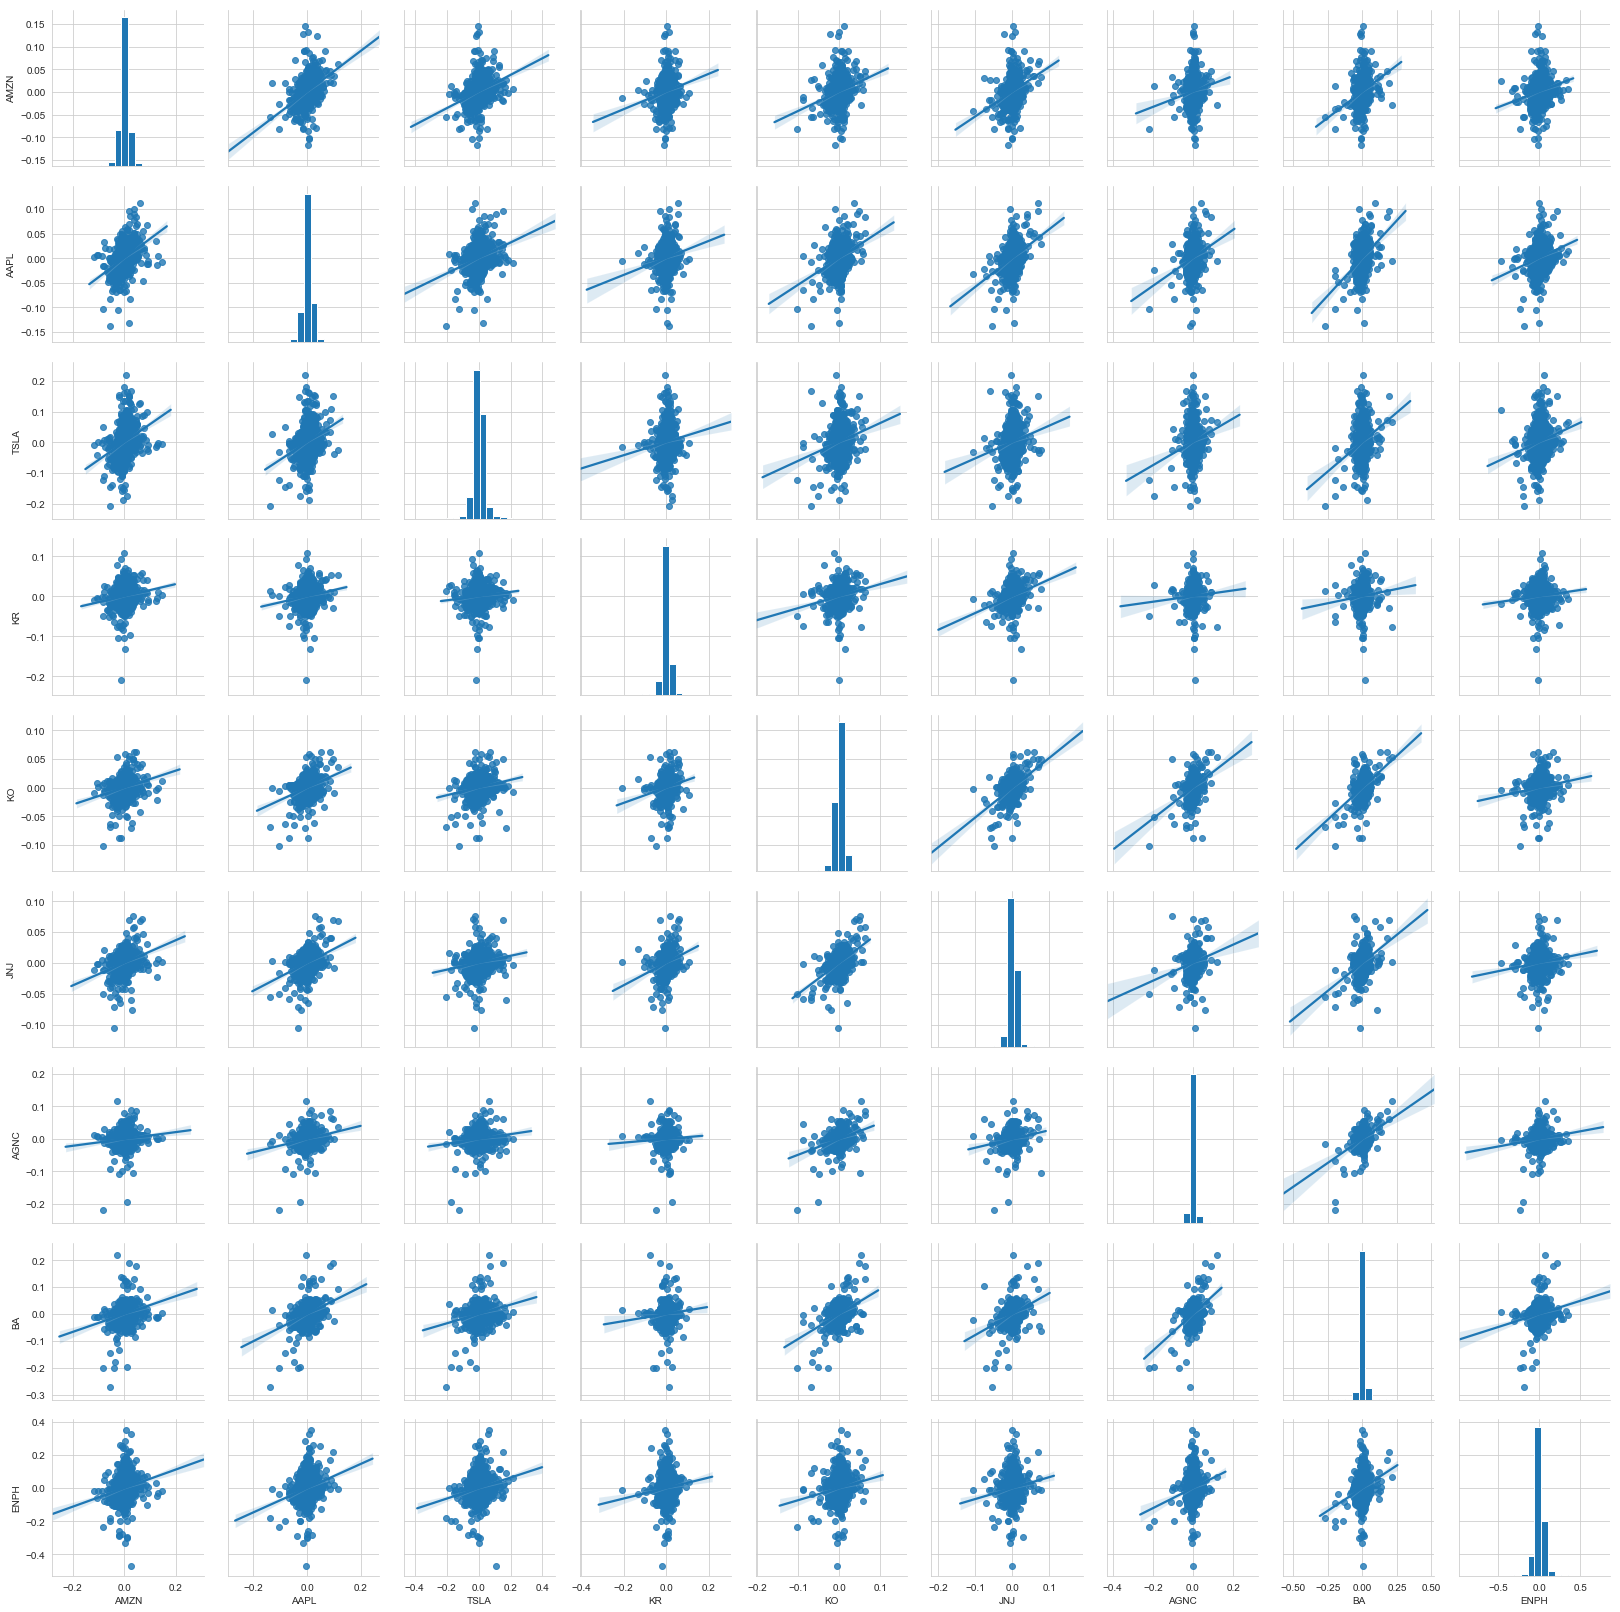

In [544]:
sns.set_style('whitegrid')
regression = sns.pairplot(returns[1:], kind="reg")
regression

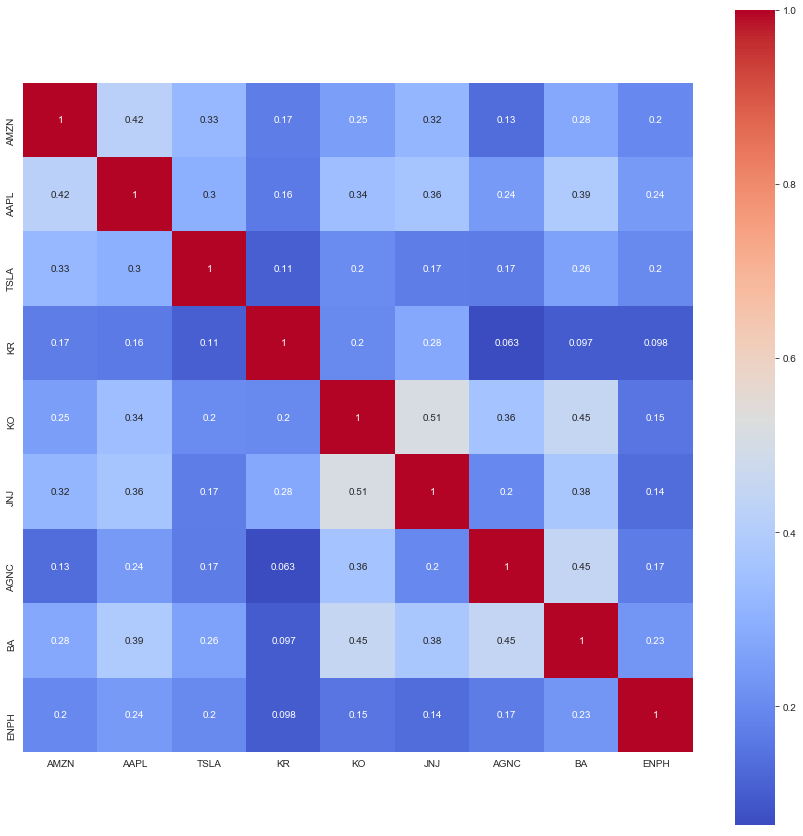

In [545]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap


## Notes

- Sell all JD after BABA earning calls (August 20)
- Sell 6% of BABA shares after earning calls (August 20)
- Re-run what happens after TSLA stock split 
- Re-run what happens after AAPL stock split
- Buy 8% JNJ shares